In [2]:
import ipywidgets as widgets
from IPython.display import display
from threading import Thread
from queue import Queue
import pyaudio, os, wave
# import speech_recognition as sr
import numpy as np

In [3]:
message = Queue()
recording = Queue()

# Create a button
record_button = widgets.Button(
    description="Record",
    disabled = False,
    button_style="success", 
    icon  = 'microphone'
)

stop_button = widgets.Button(
    description="Stop",
    disabled = False,
    button_style="warning",
    icon  = "stop"
)

output = widgets.Output()

In [4]:
CHANNELS = 1
FRAME_RATE = 44100
RECORD_SECONDS = 10
AUDIO_FORMAT = pyaudio.paInt16
SAMPLE_SIZE = 2

In [6]:
def record_microphone(chunk=1024):
    p = pyaudio.PyAudio()   
    # r = sr.Recognizer()

    stream = p.open(format=AUDIO_FORMAT,
                    channels=CHANNELS,
                    rate = FRAME_RATE,
                    input = True,
                    input_device_index = 1,
                    frames_per_buffer=chunk)

    frames = []
    while not message.empty():
        data = stream.read(chunk)
        frames.append(data)

        if len(frames) >= (FRAME_RATE / chunk) * RECORD_SECONDS:
            recording.put(frames.copy())
            frames = []
        
    stream.stop_stream()
    stream.close()
    p.terminate()

    wf = wave.open('output.wav', 'wb')
    wf.setnchannels(CHANNELS)
    wf.setsampwidth(p.get_sample_size(AUDIO_FORMAT))
    wf.setframerate(FRAME_RATE)
    wf.writeframes(b''.join(frames))
    wf.close() 

In [7]:
def start_record(data):
    message.put(True)

    with output:
        display("Starting...")
        record = Thread(target=record_microphone)
        record.start()


def stop_record(data):
    with output:
        message.get()
        display("Stopped")

record_button.on_click(start_record)
stop_button.on_click(stop_record)

display(record_button, stop_button, output)

Button(button_style='success', description='Record', icon='microphone', style=ButtonStyle())

Button(button_style='warning', description='Stop', icon='stop', style=ButtonStyle())

Output()

In [37]:
# import pyaudio
# p = pyaudio.PyAudio()
# for i in range(p.get_device_count()):
#     print(p.get_device_info_by_index(i))
# p.terminate()

In [38]:
# import speech_recognition as s_r
# r = s_r.Recognizer()
# my_mic = s_r.Microphone(device_index=1) #my device index is 1, you have to put your device index
# with my_mic as source:
#     print("Say now!!!!")
#     audio = r.listen(source) #take voice input from the microphone
# print(r.recognize_google(audio)) #to print voice into text

In [39]:
try:
    # Recognize audio input from output.wav
    r = sr.Recognizer()
    audio = sr.AudioFile('output.wav')
    with audio as source:
        audio_file = r.record(source)
    result = r.recognize_google(audio_file)
    print(result)
except:
    pass

In [9]:
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import lfilter, freqz, butter, filtfilt

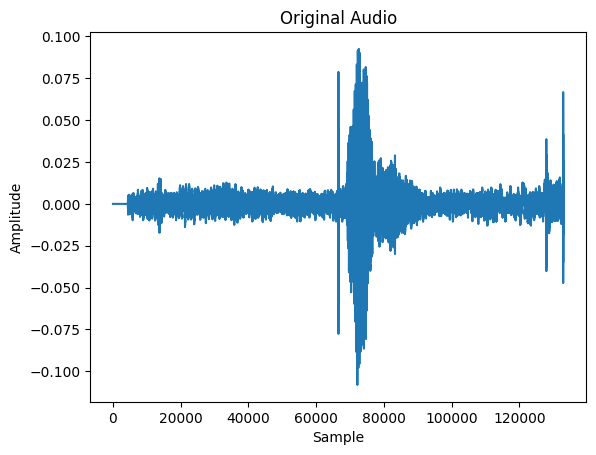

In [10]:
# Load the original audio waveform from a file
audio_data, sample_rate = sf.read('D:\\dsp\\final\\yes.wav')

# Plot the original audio waveform
plt.plot(audio_data)
plt.title('Original Audio')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

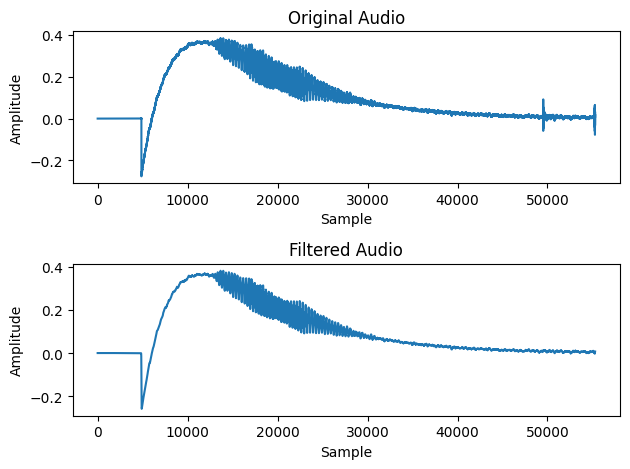

In [12]:
# Load the original audio waveform from a file
audio_data1, sample_rate1 = sf.read('D:\\dsp\\final\\no.wav')

# Plot the original audio waveform
plt.subplot(2, 1, 1)
plt.plot(audio_data1)
plt.title('Original Audio')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Remove noise from the audio waveform
filter_order = 1
cutoff_frequency = 1000.0
normalized_cutoff_frequency = 2 * cutoff_frequency / sample_rate
b, a = butter(filter_order, normalized_cutoff_frequency, btype='low')

# Apply the filter to the noisy audio data
filtered_audio = filtfilt(b, a, audio_data1)

output_file = 'filtered_audio.wav'
sf.write(output_file, filtered_audio, sample_rate)

# Plot the filtered audio waveform
plt.subplot(2, 1, 2)
plt.plot(filtered_audio)
plt.title('Filtered Audio')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

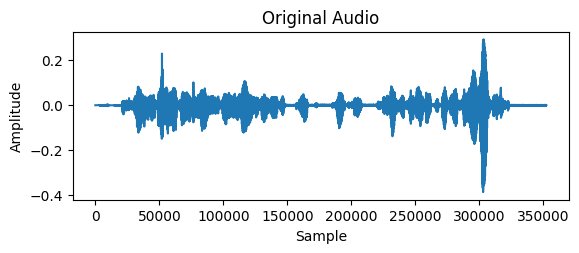

In [43]:
# Load the original audio waveform from a file    (Viet Tung)
audio_data2, sample_rate2 = sf.read('output.wav')

# Plot the original audio waveform
plt.subplot(2, 1, 1)
plt.plot(audio_data2)
plt.title('Original Audio')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

c:\Users\Viet Tung\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


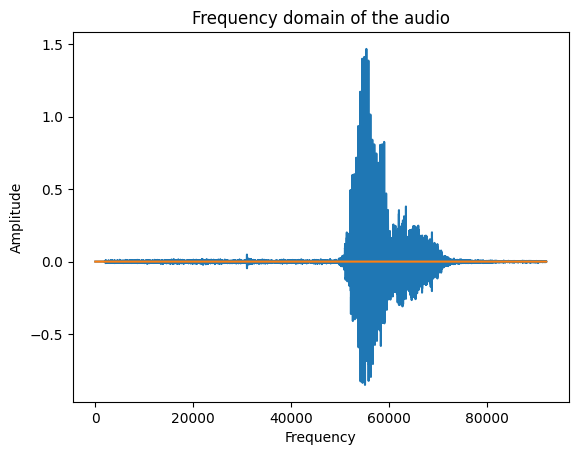

In [44]:
# Convert to frequency domain (Minh Tung)
audio_data_fft = np.fft.fft(audio_data)

# Plot the frequency domain
plt.plot(audio_data_fft)
plt.title('Frequency domain of the audio')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

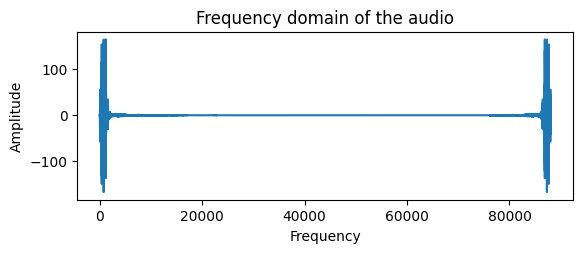

In [45]:
# Convert to frequency domain (Quang Sang)
audio_data1_fft = np.fft.fft(filtered_audio)

# Plot the frequency domain
plt.subplot(2, 1, 2)
plt.plot(audio_data1_fft)
plt.title('Frequency domain of the audio')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

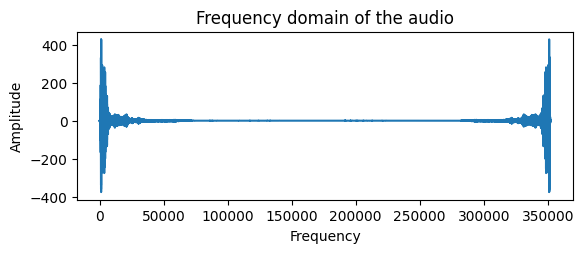

In [46]:
# Convert to frequency domain (Viet Tung)
audio_data2_fft = np.fft.fft(audio_data2)

# Plot the frequency domain 
plt.subplot(2, 1, 2)
plt.plot(audio_data2_fft)
plt.title('Frequency domain of the audio')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

C:\Users\Viet Tung\AppData\Local\Temp\ipykernel_6836\2053726468.py:12: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  sound_info = pylab.fromstring(frames, 'int16')


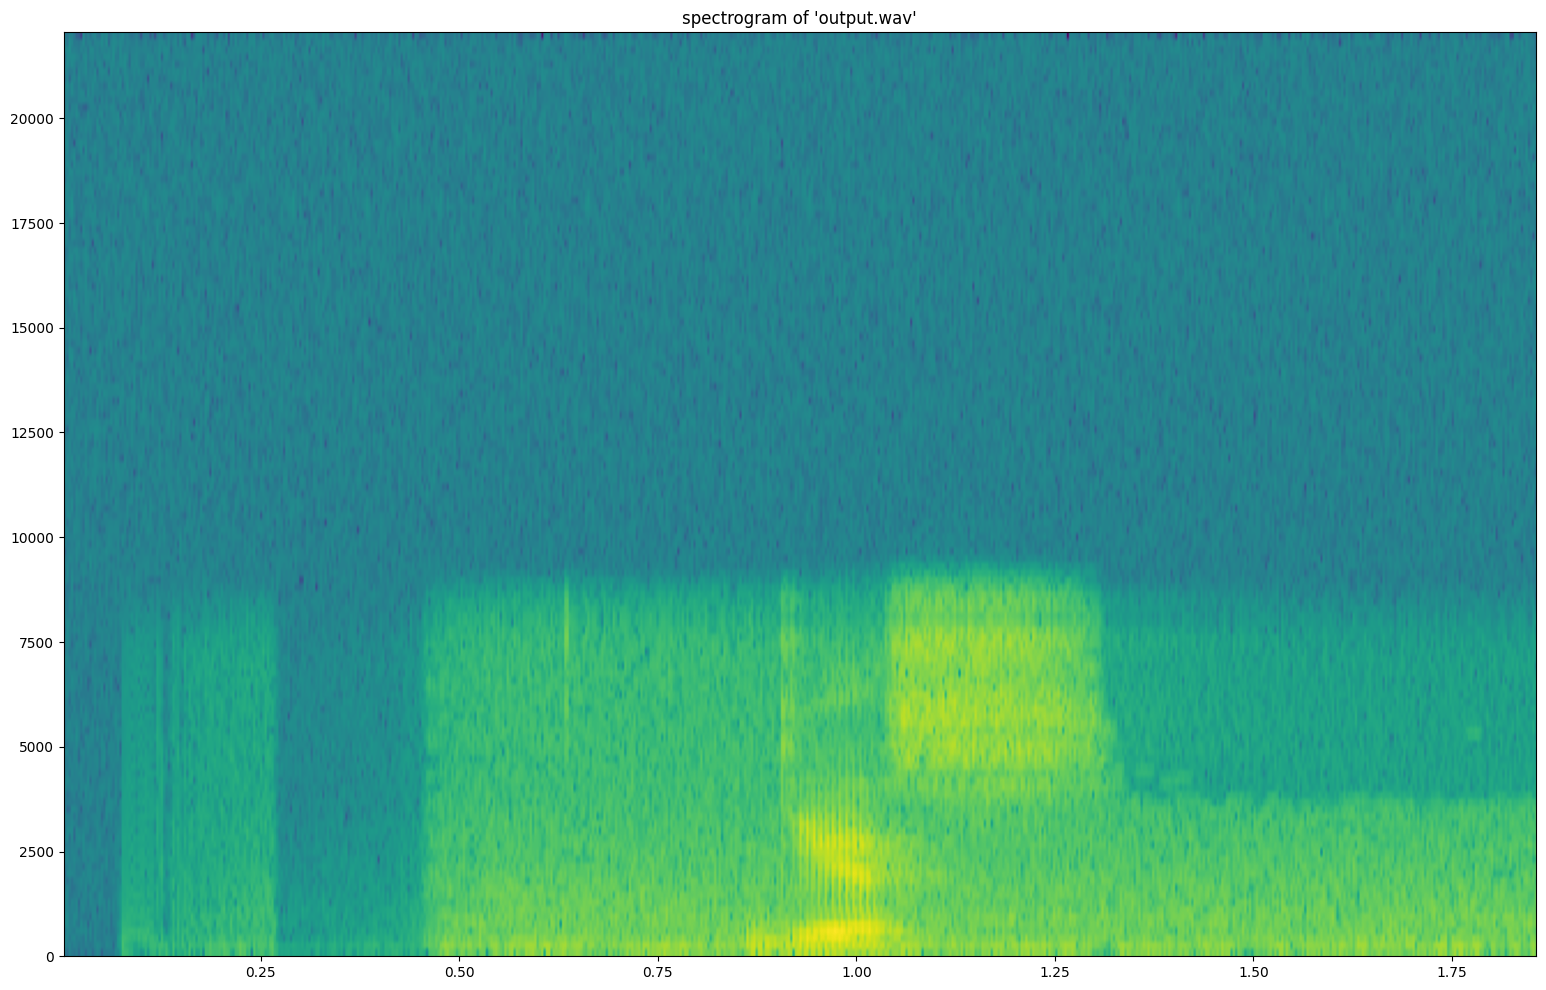

In [48]:
import pylab
def graph_spectrogram(wav_file):
    sound_info, frame_rate = get_wav_info(wav_file)
    pylab.figure(num=None, figsize=(19, 12))
    pylab.subplot(111)
    pylab.title('spectrogram of %r' % wav_file)
    pylab.specgram(sound_info, Fs=frame_rate)
    pylab.savefig('spectrogram.png')
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.fromstring(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

graph_spectrogram("output.wav")